In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [147]:
df=pd.read_csv("customer_booking.csv", encoding = "ISO-8859-1")

pd.set_option('display.max_columns', None)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [149]:
df.duplicated().sum()

719

In [150]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [151]:
#check for missing values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [152]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [153]:
df['flight_hour'].unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21], dtype=int64)

<Figure size 500x500 with 0 Axes>

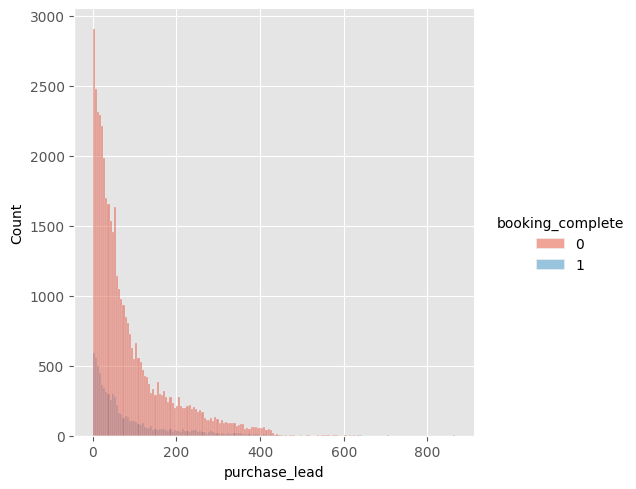

<Figure size 500x500 with 0 Axes>

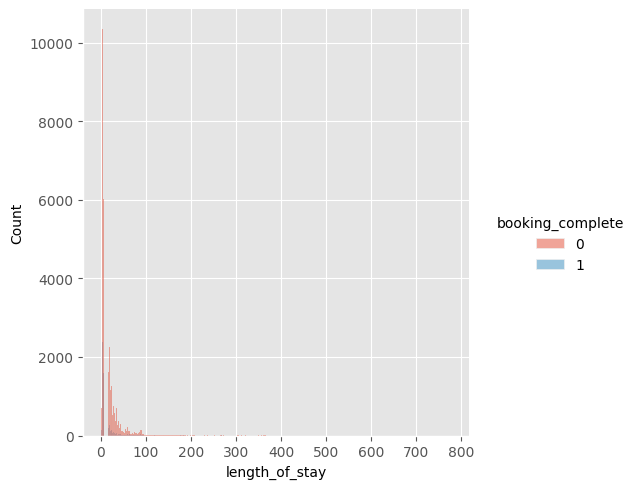

<Figure size 500x500 with 0 Axes>

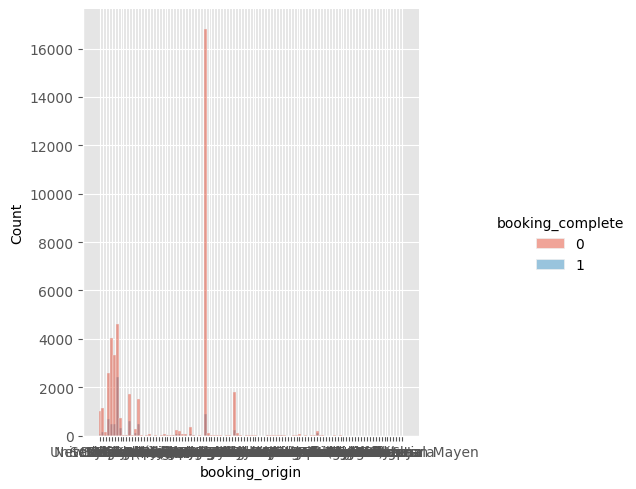

<Figure size 500x500 with 0 Axes>

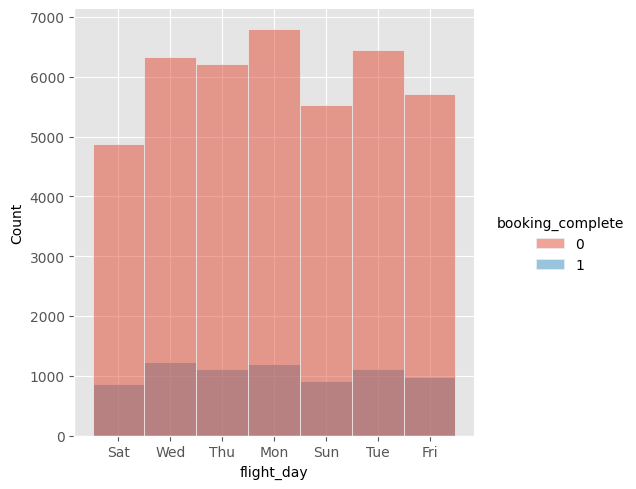

<Figure size 500x500 with 0 Axes>

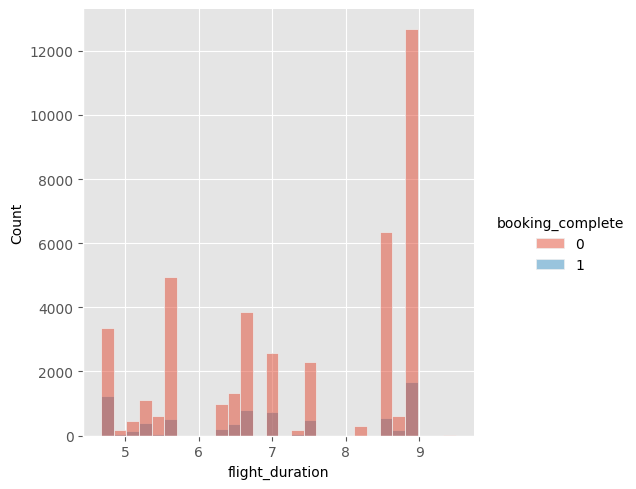

In [154]:
column = ['purchase_lead', 'length_of_stay', 'booking_origin', 'flight_day', 'flight_duration']
for i in column:
    plt.figure(figsize = (5,5), dpi = 100)
    sns.displot(x = i, data = df, hue = df['booking_complete'])
    plt.show()

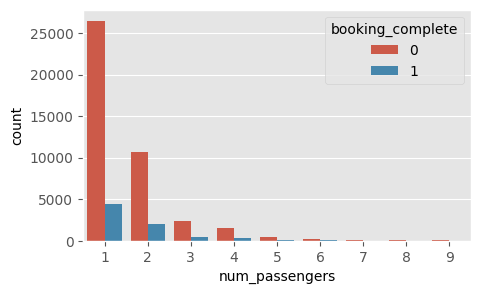

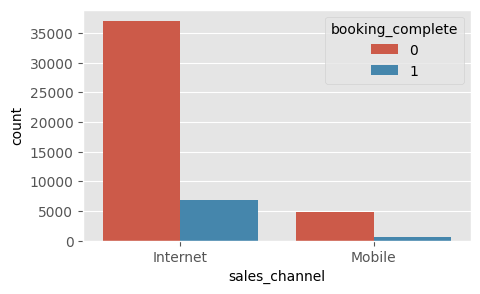

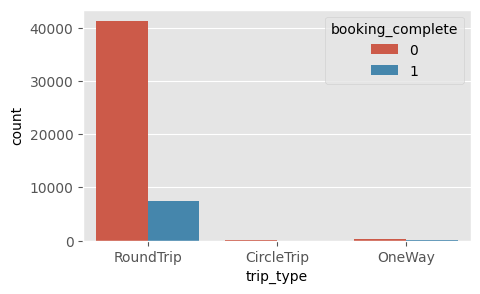

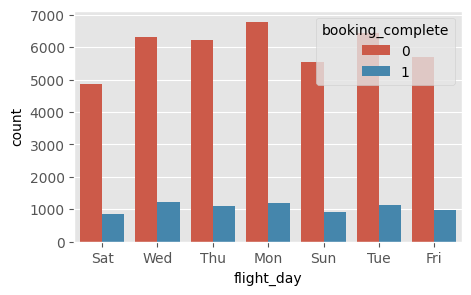

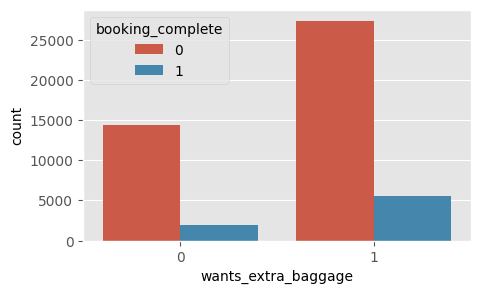

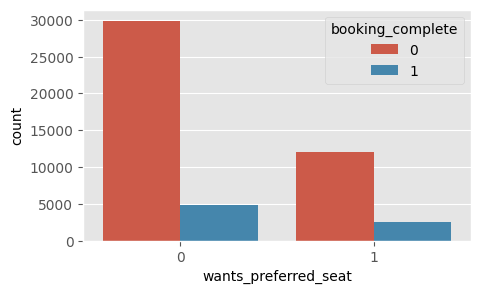

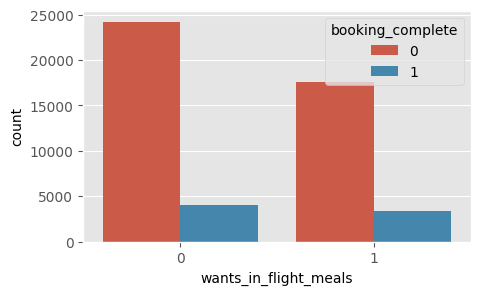

In [155]:
column = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
for i in column:
    plt.figure(figsize = (5,3), dpi = 100)
    sns.countplot(x = i, data = df, hue = df['booking_complete'])
    plt.show()

In [156]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)


mapping1 = {
    "Internet": 1,
    "Mobile": 2
}

df["sales_channel"] = df["sales_channel"].map(mapping1)


mapping2 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay" : 3
}

df["trip_type"] = df["trip_type"].map(mapping2)

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [157]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["route","booking_origin", "flight_hour", "flight_duration"]])
df[["route","booking_origin", "flight_hour", "flight_duration"]] = enc.transform(df[["route","booking_origin", "flight_hour", "flight_duration"]])

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7.0,6,0.0,61.0,1,0,0,8.0,0
1,1,1,1,112,20,3.0,6,0.0,61.0,0,0,0,8.0,0
2,2,1,1,243,22,17.0,3,0.0,36.0,1,1,0,8.0,0
3,1,1,1,96,31,4.0,6,0.0,61.0,0,0,1,8.0,0
4,2,1,1,68,22,15.0,3,0.0,36.0,1,0,1,8.0,0


In [158]:
cols_to_scale = ['purchase_lead', 'length_of_stay']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,1.960824,-0.119827,7.0,6,0.0,61.0,1,0,0,8.0,0
1,1,1,1,0.301703,-0.090269,3.0,6,0.0,61.0,0,0,0,8.0,0
2,2,1,1,1.750668,-0.031153,17.0,3,0.0,36.0,1,1,0,8.0,0
3,1,1,1,0.124730,0.234868,4.0,6,0.0,61.0,0,0,1,8.0,0
4,2,1,1,-0.184973,-0.031153,15.0,3,0.0,36.0,1,0,1,8.0,0


In [159]:
# df1 = df.drop(['num_passengers', 'trip_type', 'purchase_lead', 'flight_hour', 'flight_day'], axis=1)
# df1.head()

# df1 = df.drop(['flight_day'], axis=1)
# df1.head()

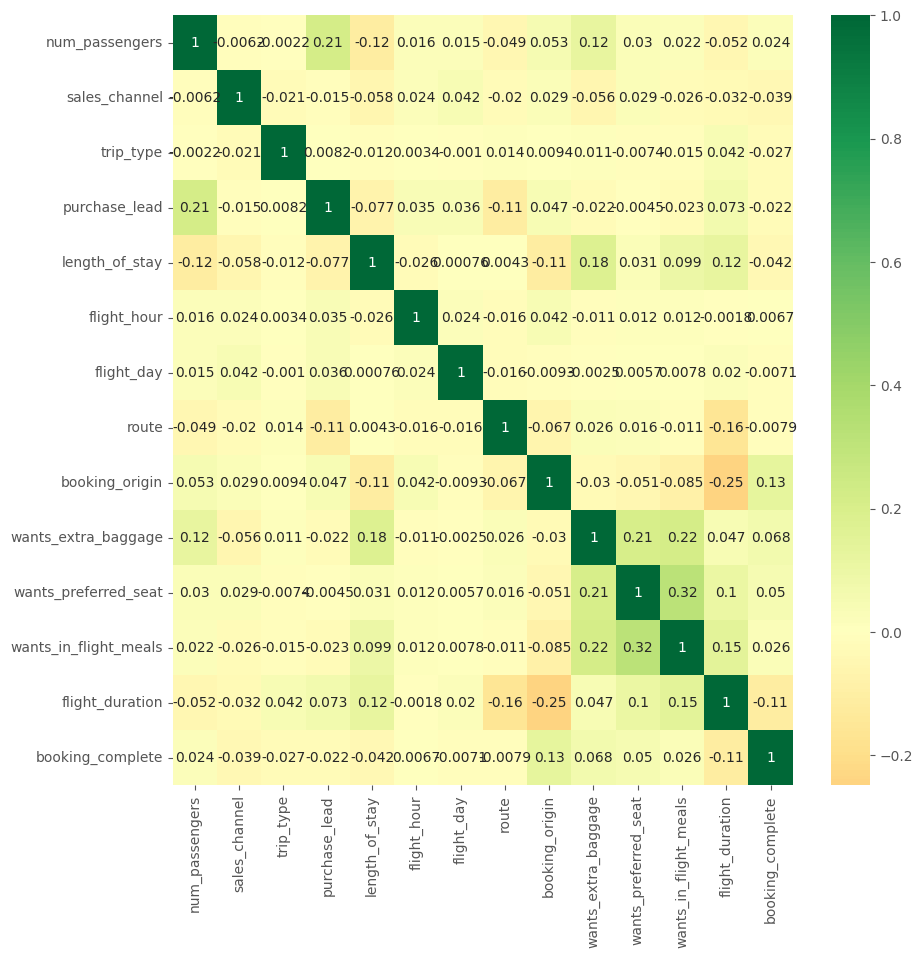

In [160]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',center=0) 

In [161]:
X = df.drop(['booking_complete'], axis = 1).values
Y = df[['booking_complete']].values

X1 = df.drop(['booking_complete'], axis = 1)
Y1 = df[['booking_complete']]

In [162]:
# X = df1.drop(['booking_complete'], axis = 1).values
# Y = df1[['booking_complete']].values

# X1 = df1.drop(['booking_complete'], axis = 1)
# Y1 = df1[['booking_complete']]

In [163]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [164]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3)

In [165]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (34496, 13)
Training Labels Shape :  (34496, 1)
Testing Data Shape    :  (14785, 13)
Testing Labels Shape  :  (14785, 1)


## KNN Classifier

In [166]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [167]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.8722750463821892
Testing Set Accuracy  :  0.8247548190733852


In [168]:
acc_train = []
acc_test  = []

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

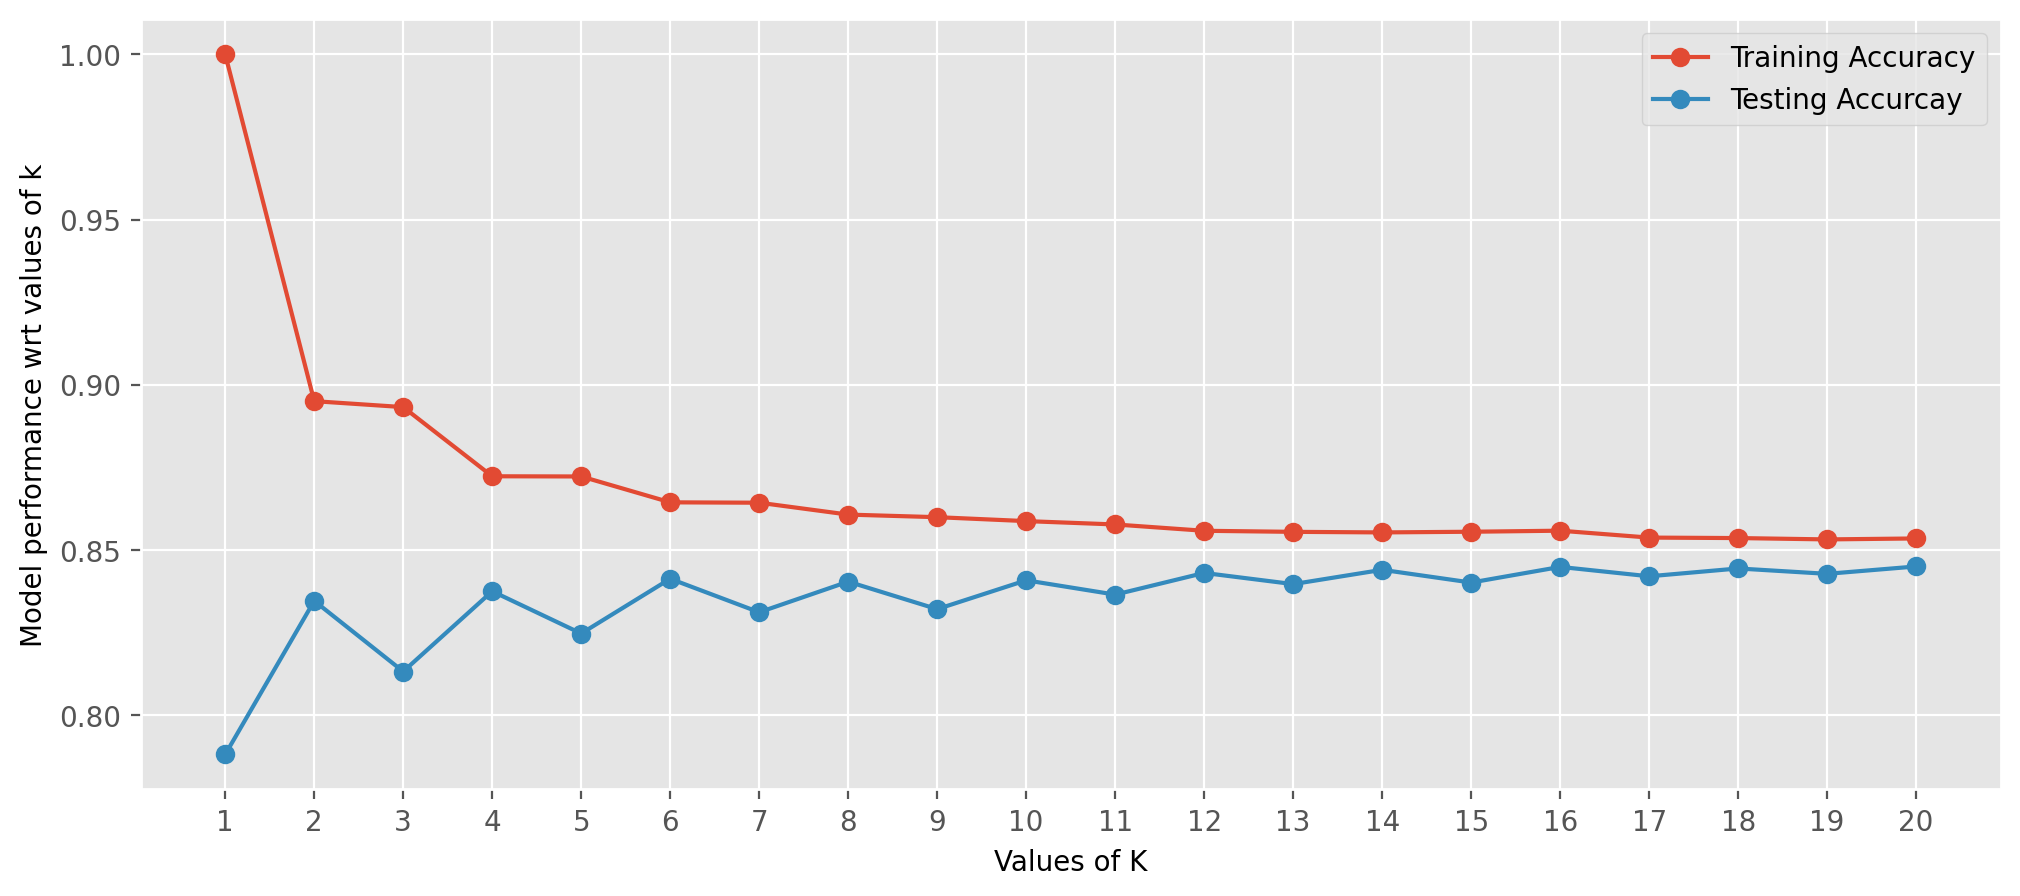

In [169]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [170]:
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.864448051948052
Testing Set Accuracy  :  0.8413256679066622


## Regularised

In [171]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 1)                             #here alpha is not learning rate but regularization parameter
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.008747050748545204
Testing Set Score  :  0.009880530201226922


In [172]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1)                             #here alpha is not learning rate but regularization parameter
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score  : ', regressor.score(x_test, y_test))

Training Set Score :  0.0356897284702421
Testing Set Score  :  0.04186118933236349


## Decision Tree Classifier

In [173]:
# not an ensemble
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 2)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2)

In [174]:
print('Training Set Accuracy: ', dt_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', dt_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8503304730983302
Testing Set Accuracy:  0.8493067297937098


## Random Forest Classifier

In [175]:
# Bagging ensemble
from sklearn.ensemble import RandomForestClassifier
rt_classifier = RandomForestClassifier(n_estimators = 2, max_depth = 2, random_state = 2)
rt_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=2, random_state=2)

In [176]:
print('Training Set Accuracy: ', rt_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', rt_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8503304730983302
Testing Set Accuracy:  0.8493067297937098


## XGBoost

In [177]:
# Boosting Ensemble
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 4)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=4, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
print('Training Set Accuracy: ', xg_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', xg_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8516929499072357
Testing Set Accuracy:  0.8487656408522151


## Light GBM

In [179]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators = 2)
lg_classifier.fit(x_train, y_train)

LGBMClassifier(n_estimators=2)

In [180]:
print('Training Set Accuracy: ', lg_classifier.score (x_train, y_train))
print('Testing Set Accuracy: ', lg_classifier.score (x_test, y_test))

Training Set Accuracy:  0.8503304730983302
Testing Set Accuracy:  0.8493067297937098


In [181]:
# import shap
# # Fits the explainer
# explainer = shap.Explainer(lg_classifier.predict, x_train)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(x_test)

In [182]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(lg_classifier, x1_train)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(x1_test)

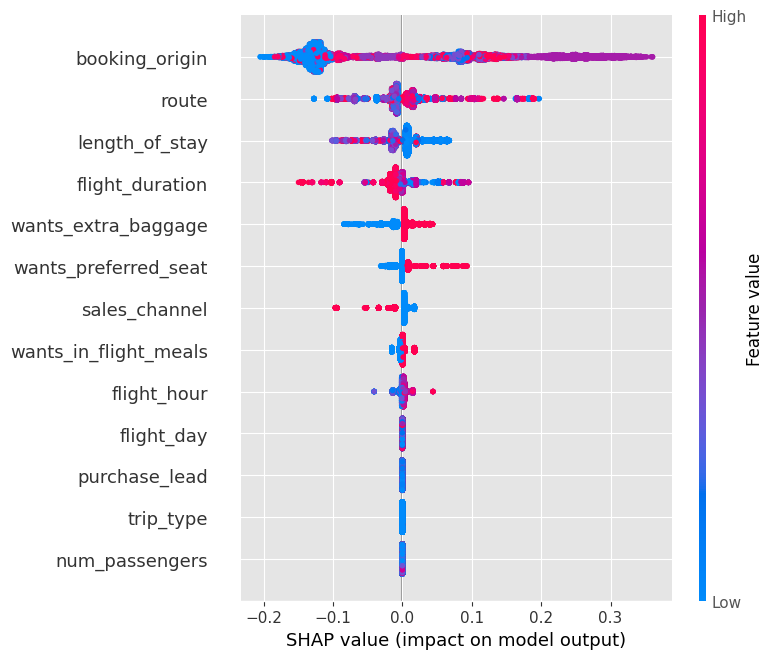

In [183]:
shap.summary_plot(shap_values, x1_test)

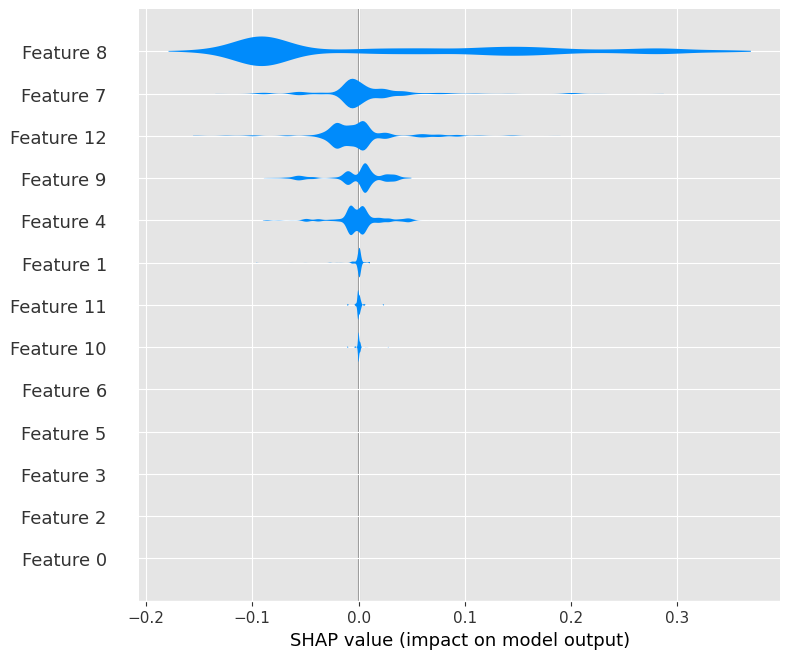

In [103]:
shap.summary_plot(shap_values, plot_type='violin')

## Ensemble

In [ ]:
dt_class = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

knn_class = KNeighborsClassifier(n_neighbors = 10)

lg_class = LGBMClassifier(n_estimators = 2)

xg_class = XGBClassifier(n_estimators = 2)

rf_class = RandomForestClassifier(n_estimators = 2, max_depth = 2)

In [ ]:
from sklearn.ensemble import VotingClassifier
vt_class = VotingClassifier(estimators = [('dt', dt_class),
                                              ('KNN', knn_class),
                                              ('lg', lg_class),
                                              ('xg', xg_class),
                                              ('rf', rf_class)])

vt_class.fit(x_train, y_train)

print('Training Set Score : ', vt_class.score(x_train, y_train))
print('Testing Set Score  : ', vt_class.score(x_test, y_test))

# ANN Classification

In [138]:
# model = tf.keras.models.Sequential()
# model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# # model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# model.summary()


model = tf.keras.models.Sequential()
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dropout(rate = 0.1))
# model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dropout(rate = 0.1))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 84        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.Adam(0.01),
              metrics = ['accuracy'])

In [140]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    batch_size = 10,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
3450/3450 [==============================] - 37s 10ms/step - loss: 0.4211 - accuracy: 0.8504 - val_loss: 0.4257 - val_accuracy: 0.8486
Epoch 2/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4220 - accuracy: 0.8506 - val_loss: 0.4253 - val_accuracy: 0.8486
Epoch 3/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486
Epoch 4/5
3450/3450 [==============================] - 36s 10ms/step - loss: 0.4220 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486
Epoch 5/5
3450/3450 [==============================] - 37s 11ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.4255 - val_accuracy: 0.8486


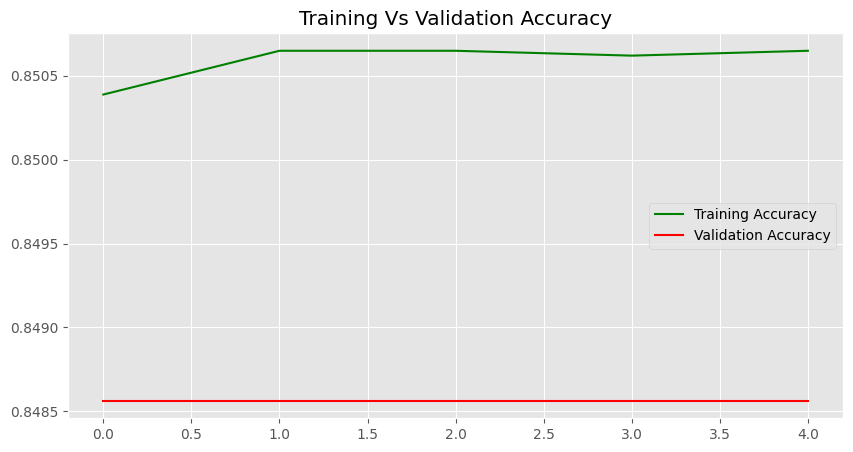

In [141]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend()

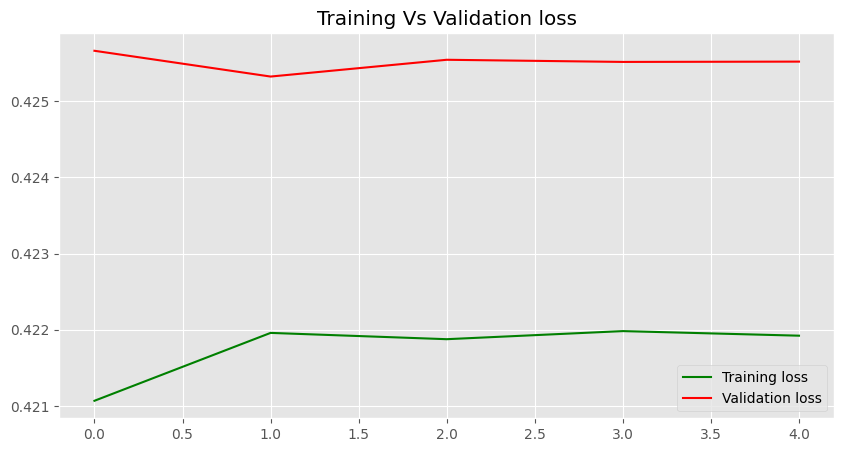

In [142]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(train_loss, color = 'green', label = 'Training loss')
plt.plot(val_loss, color = 'red', label = 'Validation loss')
plt.title('Training Vs Validation loss')
plt.legend()

In [143]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

********************
1479/1479 [==============================] - 10s 6ms/step - loss: 0.4255 - accuracy: 0.8486
Test score: 0.4255165159702301
Test accuracy: 0.8485627174377441


Text(0.5, 23.52222222222222, 'Predicted label')

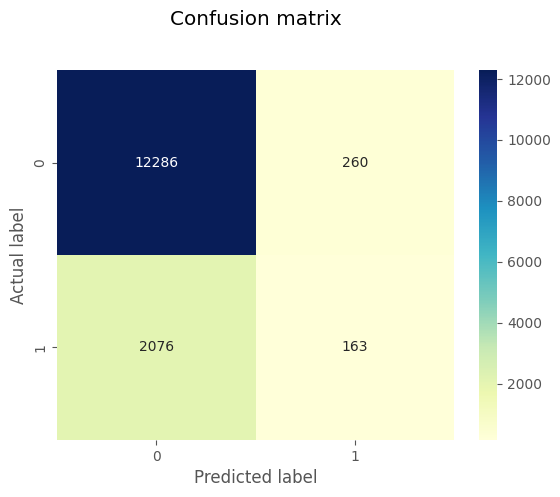

In [144]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [145]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     12546
           1       0.39      0.07      0.12      2239

    accuracy                           0.84     14785
   macro avg       0.62      0.53      0.52     14785
weighted avg       0.78      0.84      0.79     14785

